# Capstone Webscrapping using BeautifulSoup

One of capstone project with objective to do webscrapping by using BeautifulSoup

This notebook will provide step by step to do webscrapping using BeautifulSoup from IMDb website. We will scrap list of movie in 2019 that has been order ascending based on popularity.

We will do simple analysis from the list movie that we got from scrapping

Enjoy !!

In [1]:
#called library that we will use, we will several library such as pandas, numpy for data
#library requests for URL and matplotlib, seaborn for teh visualization

import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
#put URL of IMDb here
url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')
url_get.content[1:500] #to display the HTML code

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle",'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: `Tag`, `NavigableString`, `BeautifulSoup`, and `Comment`. But at this module we will only use `BeautifulSoup`.

In [3]:
#library that we will use for scrapping : BeautifulSoup

from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


Let's see how our beautifulsoup looks like. As you can see, the content is the same with our `get_url` object but it's tidier. Also beautifulsoup give us method to make it even more prettier, for tidyness purpouse we slice to only see first 1045 character. 

In [4]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

Find the key and put the key into the `.find()` . Do inspect on website IMDb and we got lister-list as the head of list movie

In [5]:
table = soup.find(class_="lister-list",attrs={'class'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8111088/">
    <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,6


Start Scrapping here by define some variable (pages and temp) before we did the looping process

In [6]:
#pages is used for help to move into next page. Current URL only show the firs 50 movie
#we will scrapping 100 list movie from the website IMDb

pages = np.arange(1,101,50)
pages

array([ 1, 51])

In [7]:
#temp was used for store some variable such as title, year, duration, IMDb rating, metascore
temp = []

In [8]:
headers = {"Accept-Language": "en-US,en;q=0.5"}

In [9]:
#first for was used to move / navigate page from 1st page until the 2000th movie
#example next page https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31&start=51&ref_=adv_nxt
for page in pages:
    page = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31&start='+str(page)+'&ref_=adv_nxt',headers=headers)
    
    soup = BeautifulSoup(page.text,'html.parser')
    movie_div = soup.find_all('div', class_='lister-item mode-advanced')

    #second loop was used for scrapping data for each page, we will take some variables such as   
    #title, year, duration, IMDb rating, metascore  
    
    for row in movie_div:
        #title movie 
        title = row.find(class_="lister-item-header").find('a', href=True).text
        
        #year
        year = row.find(class_="lister-item-year text-muted unbold").text
        
        #imdb rating
        if row.find(class_="inline-block ratings-imdb-rating") is None:
           imdb = row.find(class_="inline-block ratings-imdb-rating").find('strong')
        else:
           imdb = row.find(class_="inline-block ratings-imdb-rating").find('strong').text
        #metascore, use if else due to we have null value for several movie
        if row.find(class_="metascore mixed") is None:
           meta = row.find(class_="metascore mixed") 
        else:
           meta = row.find(class_="metascore mixed").text  
    
        #votes
        votes = row.find(class_="sort-num_votes-visible").text.split()[1]
        
        #duration, because some movie also don't have duration
        if row.find('p', class_="text-muted").find(class_="runtime") is None:
           duration = row.find('p', class_="text-muted").find(class_="runtime")
        else:
           duration = row.find('p', class_="text-muted").find(class_="runtime").text
        
        #genre
        genre = row.find(class_="genre").text.strip()
        
        #temp variable used for collect all variables result of scrapping
        temp.append((title,year,imdb,meta,votes,duration, genre))
temp

[('The Mandalorian',
  '(2019– )',
  '8.7',
  None,
  '220,069',
  '40 min',
  'Action, Adventure, Sci-Fi'),
 ('His Dark Materials',
  '(2019– )',
  '7.9',
  None,
  '42,239',
  '60 min',
  'Adventure, Drama, Family'),
 ('The Boys',
  '(2019– )',
  '8.7',
  None,
  '218,061',
  '60 min',
  'Action, Comedy, Crime'),
 ('Dreamland',
  '(I) (2019)',
  '5.7',
  '57        ',
  '1,234',
  '98 min',
  'Drama, Thriller'),
 ('Jojo Rabbit',
  '(2019)',
  '7.9',
  '58        ',
  '278,348',
  '108 min',
  'Comedy, Drama, War'),
 ('Servant',
  '(2019– )',
  '7.6',
  None,
  '15,900',
  '30 min',
  'Drama, Horror, Thriller'),
 ('Wayne', '(2019)', '8.4', None, '8,550', '30 min', 'Action, Comedy'),
 ('The Gentlemen',
  '(2019)',
  '7.8',
  '51        ',
  '207,942',
  '113 min',
  'Action, Comedy, Crime'),
 ('Undercover',
  '(2019– )',
  '7.9',
  None,
  '9,474',
  '50 min',
  'Crime, Drama, Thriller'),
 ('The Witcher',
  '(2019– )',
  '8.2',
  None,
  '282,786',
  '60 min',
  'Action, Adventure, Fan

limit_output extension: Maximum message size of 10000 exceeded with 10137 characters

In [10]:
#set temp variables above to be dataframe structure using pandas library
data = pd.DataFrame(temp, columns=('title','year','imdb','meta','votes','duration','genre'))

#we have 100 list movie that successfully scraped 
data.shape
#display(HTML(data.to_html()))

(100, 7)

In [11]:
data.dtypes
#need to change type of data due to all data type was object

title       object
year        object
imdb        object
meta        object
votes       object
duration    object
genre       object
dtype: object

In [12]:
#modify data type
data['duration']= data['duration'].str.replace(" min","")
data['rank_popularity']=range(1,len(data)+1)
data['imdb']=data['imdb'].astype('float64')
data['votes']=data['votes'].str.replace(",","").astype('int64')
data['duration'] = data['duration'].fillna(0).astype('int64')
data['meta'] = data['meta'].fillna(0).astype('int64')

In [13]:
data.dtypes
#some of data already change 

title               object
year                object
imdb               float64
meta                 int64
votes                int64
duration             int64
genre               object
rank_popularity      int64
dtype: object

In [14]:
#split types of genre to each column (breakdown to 3 columns)
genre = data['genre'].str.split(', ',3,expand=True)
genre

,0,1,2
0,Action,Adventure,Sci-Fi
1,Adventure,Drama,Family
2,Action,Comedy,Crime
3,Drama,Thriller,None
4,Comedy,Drama,War
...,...,...,...
95,Crime,Drama,Mystery
96,Comedy,Romance,None
97,Action,Adventure,Sci-Fi
98,Action,Crime,Thriller


In [15]:
#for assign each genre to genre 1, genre 2 and genre 3
data['genre_1']=genre[0]
data['genre_2']=genre[1]
data['genre_3']=genre[2]

In [16]:
#conditional function if one of column from genre 1-3 consist this type of genres
action = (data['genre_1']=="Action") | (data['genre_2']=="Action") | (data['genre_3']=="Action")
drama = (data['genre_1']=="Drama") | (data['genre_2']=="Drama") | (data['genre_3']=="Drama")
thriller = (data['genre_1']=="Thriller") | (data['genre_2']=="Thriller") | (data['genre_3']=="Thriller")

In [17]:
#create new columns based on thise conditional
data['Action'] = np.where(action,'Yes','No')
data['Drama'] = np.where(drama,'Yes','No')
data['Thriller'] = np.where(thriller,'Yes','No')

In [18]:
#check new dataframe
data.head(10)

,title,year,imdb,meta,votes,duration,genre,rank_popularity,genre_1,genre_2,genre_3,Action,Drama,Thriller
0,The Mandalorian,(2019– ),8.7,0,220069,40,"Action, Adventure, Sci-Fi",1,Action,Adventure,Sci-Fi,Yes,No,No
1,His Dark Materials,(2019– ),7.9,0,42239,60,"Adventure, Drama, Family",2,Adventure,Drama,Family,No,Yes,No
2,The Boys,(2019– ),8.7,0,218061,60,"Action, Comedy, Crime",3,Action,Comedy,Crime,Yes,No,No
3,Dreamland,(I) (2019),5.7,57,1234,98,"Drama, Thriller",4,Drama,Thriller,None,No,Yes,Yes
4,Jojo Rabbit,(2019),7.9,58,278348,108,"Comedy, Drama, War",5,Comedy,Drama,War,No,Yes,No
5,Servant,(2019– ),7.6,0,15900,30,"Drama, Horror, Thriller",6,Drama,Horror,Thriller,No,Yes,Yes
6,Wayne,(2019),8.4,0,8550,30,"Action, Comedy",7,Action,Comedy,None,Yes,No,No
7,The Gentlemen,(2019),7.8,51,207942,113,"Action, Comedy, Crime",8,Action,Comedy,Crime,Yes,No,No
8,Undercover,(2019– ),7.9,0,9474,50,"Crime, Drama, Thriller",9,Crime,Drama,Thriller,No,Yes,Yes
9,The Witcher,(2019– ),8.2,0,282786,60,"Action, Adventure, Fantasy",10,Action,Adventure,Fantasy,Yes,No,No


Analysis some relation for imdb rating with votes and movie duration

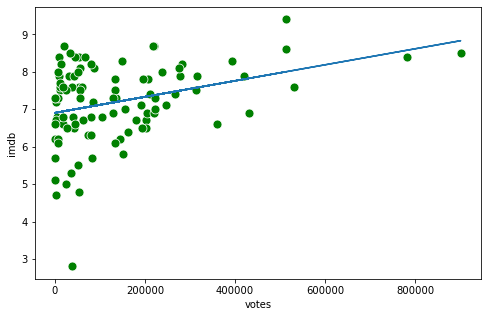

In [19]:
#create plot relation between votes and imdb rating

fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
m, b = np.polyfit(data['votes'],data['imdb'],1)
sns.scatterplot(data=data, x='votes', y='imdb',s=80, ax=ax, color='green')
plt.plot(data['votes'],m*data['votes']+b)

Relation between votes imdb slightly show some relation that higher votes will impact with IMDb Rating

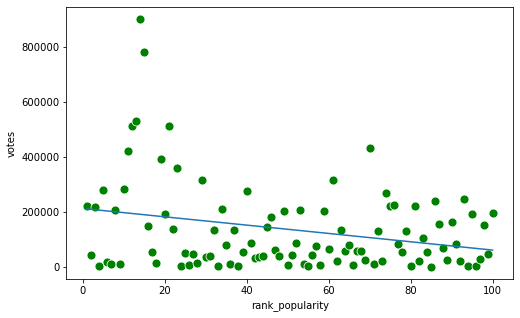

In [20]:
#create plot relation between votes and rank popularity

fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
m, b = np.polyfit(data['rank_popularity'],data['votes'],1)
sns.scatterplot(data=data, x='rank_popularity', y='votes',s=80, ax=ax, color='green')
plt.plot(data['rank_popularity'],m*data['rank_popularity']+b)

Based on rank popularity and total votes, it also reflect little bit relation that higher votes will bring up movie popularity

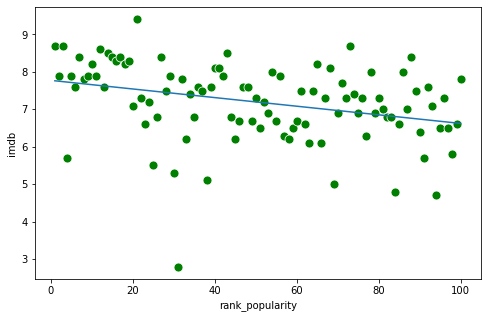

In [21]:
#create plot relation between rank of popularity and imdb rating

fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
m, b = np.polyfit(data['rank_popularity'],data['imdb'],1)
sns.scatterplot(data=data, x='rank_popularity', y='imdb',s=80, ax=ax, color='green')
plt.plot(data['rank_popularity'],m*data['rank_popularity']+b)

Then if we sort based on rank popularity from IMDb, it also reflect little bit relation that higher IMDb rating will bring up movie popularity

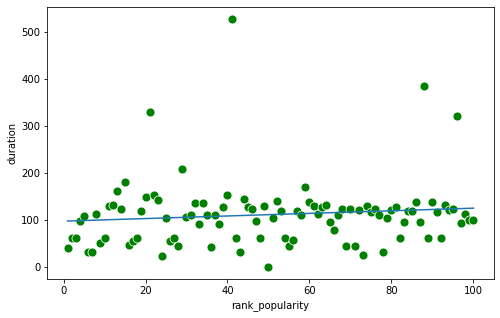

In [22]:
#create plot relation between duration and rank of popularity

fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
m, b = np.polyfit(data['rank_popularity'],data['duration'],1)
sns.scatterplot(data=data, x='rank_popularity', y='duration',s=80, ax=ax, color='green')
plt.plot(data['rank_popularity'],m*data['rank_popularity']+b)

No strong correlation between duration movie with rank of popularity

In [23]:
#create condition for metascore because some movie don't have metascore
meta2 = data[data['meta'] != 0]

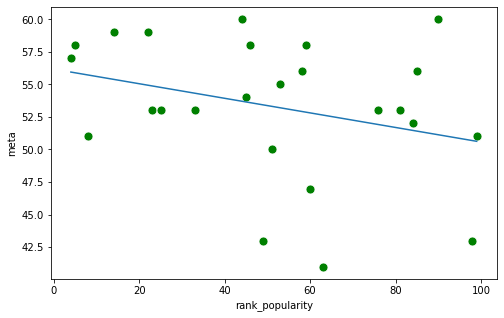

In [24]:
#create plot relation between duration and imdb rating

fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
m, b = np.polyfit(meta2['rank_popularity'],meta2['meta'],1)
sns.scatterplot(data=meta2, x='rank_popularity', y='meta',s=80, ax=ax, color='green')
plt.plot(meta2['rank_popularity'],m*meta2['rank_popularity']+b)

Higher metascore usually align with rank of popularity

Conclusion :
IMDb uses proprietary algorithms that take into account several measures of popularity for movies. The primary measure is who and what people are looking at on IMDb.

Based on plots above show rank popularity usually align with total votes, IMDB rating and metascore. While duration movie doesn't have relation

In [25]:
#limit for top 7 movies
top7 = data.head(7)
top7

,title,year,imdb,meta,votes,duration,genre,rank_popularity,genre_1,genre_2,genre_3,Action,Drama,Thriller
0,The Mandalorian,(2019– ),8.7,0,220069,40,"Action, Adventure, Sci-Fi",1,Action,Adventure,Sci-Fi,Yes,No,No
1,His Dark Materials,(2019– ),7.9,0,42239,60,"Adventure, Drama, Family",2,Adventure,Drama,Family,No,Yes,No
2,The Boys,(2019– ),8.7,0,218061,60,"Action, Comedy, Crime",3,Action,Comedy,Crime,Yes,No,No
3,Dreamland,(I) (2019),5.7,57,1234,98,"Drama, Thriller",4,Drama,Thriller,None,No,Yes,Yes
4,Jojo Rabbit,(2019),7.9,58,278348,108,"Comedy, Drama, War",5,Comedy,Drama,War,No,Yes,No
5,Servant,(2019– ),7.6,0,15900,30,"Drama, Horror, Thriller",6,Drama,Horror,Thriller,No,Yes,Yes
6,Wayne,(2019),8.4,0,8550,30,"Action, Comedy",7,Action,Comedy,None,Yes,No,No


In [26]:
top7.set_index('title')

,year,imdb,meta,votes,duration,genre,rank_popularity,genre_1,genre_2,genre_3,Action,Drama,Thriller
title,,,,,,,,,,,,,
The Mandalorian,(2019– ),8.7,0,220069,40,"Action, Adventure, Sci-Fi",1,Action,Adventure,Sci-Fi,Yes,No,No
His Dark Materials,(2019– ),7.9,0,42239,60,"Adventure, Drama, Family",2,Adventure,Drama,Family,No,Yes,No
The Boys,(2019– ),8.7,0,218061,60,"Action, Comedy, Crime",3,Action,Comedy,Crime,Yes,No,No
Dreamland,(I) (2019),5.7,57,1234,98,"Drama, Thriller",4,Drama,Thriller,None,No,Yes,Yes
Jojo Rabbit,(2019),7.9,58,278348,108,"Comedy, Drama, War",5,Comedy,Drama,War,No,Yes,No
Servant,(2019– ),7.6,0,15900,30,"Drama, Horror, Thriller",6,Drama,Horror,Thriller,No,Yes,Yes
Wayne,(2019),8.4,0,8550,30,"Action, Comedy",7,Action,Comedy,None,Yes,No,No


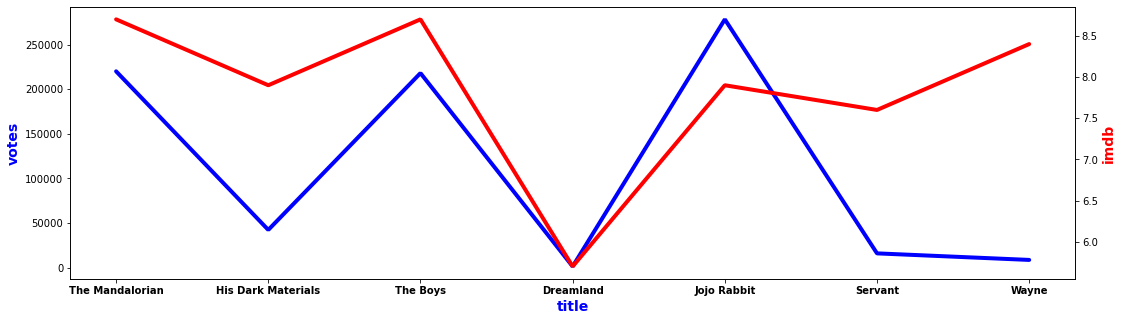

In [27]:
#create plot trend of votes, imdb rating for each top 7 movie based on popularity

fig_dims = (18, 5)
fig, ax = plt.subplots(figsize=fig_dims)
ax.set_xlabel("title",fontsize=14, color ="blue", fontweight='bold')
ax.set_ylabel("votes",fontsize=14, color ="blue", fontweight='bold')
ax.xaxis.set_ticklabels(top7['title'],color="black", fontweight='bold')
sns.lineplot(data=top7, x='title', y='votes', ax=ax, color = "blue", linewidth=4,
              solid_joinstyle='bevel', solid_capstyle='round', sort=False)

ax2 = ax.twinx()
ax2.set_ylabel("imdb",fontsize=14, color ="red", fontweight='bold')
sns.lineplot(data=top7, x='title', y='imdb', ax=ax2, color="red", linewidth=4,              
             solid_joinstyle='bevel', solid_capstyle='round', sort=False)

From top 7 movies only Dreamland that has IMDB below 7 but still in top 7 of popularity. 
While 3 movies, His Dark Material, Servant and Wayne have low votes but has high score of IMDb and popularit

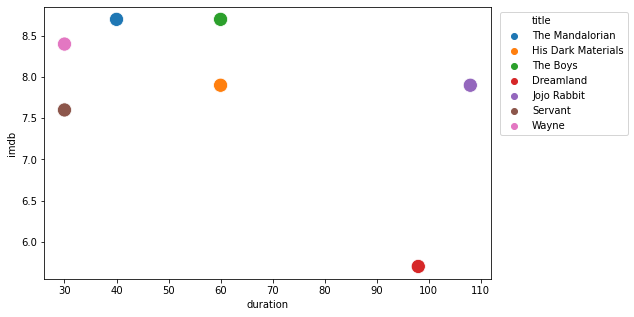

In [28]:
#create plot trend of duration, imdb rating for each top 7 movie based on popularity

fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=top7, x='duration', y='imdb', s=200, hue="title", ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

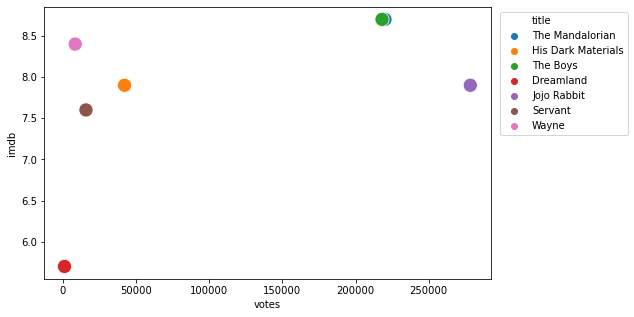

In [29]:
#create plot trend of votes, imdb rating for each top 7 movie based on popularity

fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.scatterplot(data=top7, x='votes', y='imdb', s=200, hue="title", ax=ax)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

Link for Flask Dashboard : http://127.0.0.1:5000/

In [30]:
#export data to csv file
data.to_csv('imdb.csv')

Thank you